# Emotion Prediction On Tweeter Data Using NLP

## Imported necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import contractions
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict, Counter
#import numpy as np 
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore','DepricationWarning')

import regex
import re
import string

from PIL import Image

import spacy
import time


import gensim
from spacy.tokenizer import Tokenizer
#from gensim.par

In [33]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EDA

In [34]:
data=pd.read_csv("tweeter_data.csv")
data

,tweet_id,user_id,tweet_location,date and time of tweet,user_timezone,raw_tweets,emotion
0,1467810672,scotthamilton,San Francisco CA,Mon Apr 06 22:19:49 PDT 2021,Eastern Time (US & Canada),fuckin m transtelecom,anger
1,1467810917,mattycus,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,San Diego,Mon Apr 06 22:19:49 PDT 2021,Central Time (US & Canada),packing i don t like it,anger
3,1467811193,Karoli,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,1/1 loner squad,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),quot locked up abroad quot makes bein half br...,anger
...,...,...,...,...,...,...,...
113323,1825786991,1sweetwhirl,PostVegasDepression in Texsus,Sun May 17 06:50:19 PDT 2021,Eastern Time (US & Canada),that isnt a bill about lgbt sex workers its a...,offensive
113324,1825787130,Fanny_Ingabout,Texas,Sun May 17 06:50:21 PDT 2021,Quito,lol did you just do the trump very fine peopl...,offensive
113325,1825787235,is_na,Tennessee,Sun May 17 06:50:22 PDT 2021,Quito,all i have to say is i amp facial expressions...,offensive
113326,1825787426,JustMe010,NaN,Sun May 17 06:50:24 PDT 2021,Quito,wondering what shit on our east coast causing...,offensive


In [35]:
#checking the shape of the datastest 
#number of rows and columns present in the dataset
data.shape

(113328, 7)

In [36]:
#checking the five row of datasets
data.head()

,tweet_id,user_id,tweet_location,date and time of tweet,user_timezone,raw_tweets,emotion
0,1467810672,scotthamilton,San Francisco CA,Mon Apr 06 22:19:49 PDT 2021,Eastern Time (US & Canada),fuckin m transtelecom,anger
1,1467810917,mattycus,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,San Diego,Mon Apr 06 22:19:49 PDT 2021,Central Time (US & Canada),packing i don t like it,anger
3,1467811193,Karoli,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,1/1 loner squad,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),quot locked up abroad quot makes bein half br...,anger


In [37]:
data.describe()

,tweet_id
count,1.133280e+05
mean,1.663675e+09
std,1.047540e+08
min,1.467811e+09
25%,1.559609e+09
50%,1.685465e+09
75%,1.753737e+09
max,1.825787e+09


In [38]:
#checking the null value present in the dataset
#checking the types of value present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113328 entries, 0 to 113327
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   tweet_id                113328 non-null  int64 
 1   user_id                 113328 non-null  object
 2   tweet_location          77148 non-null   object
 3   date and time of tweet  113328 non-null  object
 4   user_timezone           76516 non-null   object
 5   raw_tweets              113328 non-null  object
 6   emotion                 113328 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [39]:
data.shape

(113328, 7)

In [40]:
#checking the duplicated present the dataset
data.duplicated().sum()


0

In [41]:
data.shape

(113328, 7)

In [42]:
#checking the null value present the the dataset.
data.isnull().sum()

tweet_id                      0
user_id                       0
tweet_location            36180
date and time of tweet        0
user_timezone             36812
raw_tweets                    0
emotion                       0
dtype: int64

In [43]:
data.drop('tweet_location', axis=1, inplace=True)
data.head()


,tweet_id,user_id,date and time of tweet,user_timezone,raw_tweets,emotion
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,Eastern Time (US & Canada),fuckin m transtelecom,anger
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,Central Time (US & Canada),packing i don t like it,anger
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),quot locked up abroad quot makes bein half br...,anger


In [44]:
data.drop('user_timezone', axis=1, inplace=True)
data.head()

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger


In [45]:
data.shape

(113328, 5)

In [46]:
#fill up the null value
#data.dropna(inplace=True)
#data.isnull().sum()

In [47]:
data.shape

(113328, 5)

In [48]:
data.tail()

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion
113323,1825786991,1sweetwhirl,Sun May 17 06:50:19 PDT 2021,that isnt a bill about lgbt sex workers its a...,offensive
113324,1825787130,Fanny_Ingabout,Sun May 17 06:50:21 PDT 2021,lol did you just do the trump very fine peopl...,offensive
113325,1825787235,is_na,Sun May 17 06:50:22 PDT 2021,all i have to say is i amp facial expressions...,offensive
113326,1825787426,JustMe010,Sun May 17 06:50:24 PDT 2021,wondering what shit on our east coast causing...,offensive
113327,1825787489,McCherry,Sun May 17 06:50:24 PDT 2021,here your proof our african friends don t ge...,offensive


In [49]:
data.shape

(113328, 5)

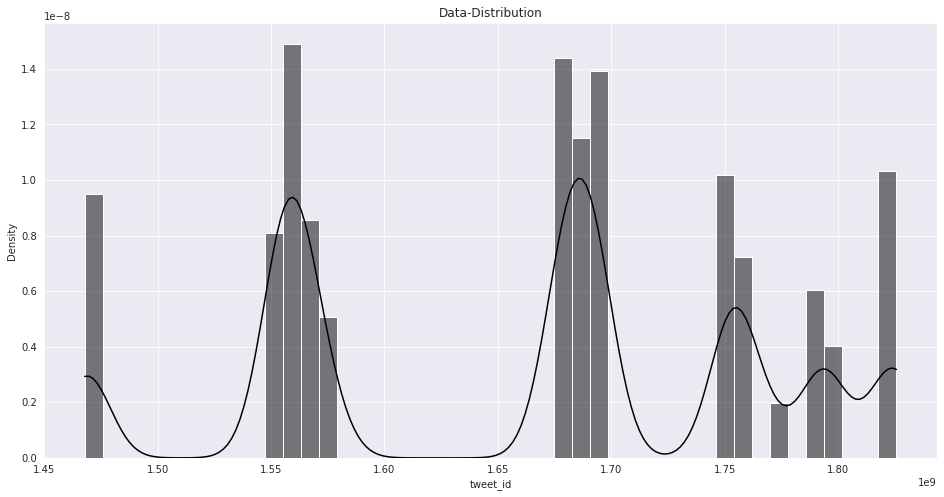

In [50]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,8))
plt.title('Data-Distribution')
sns.histplot(data['tweet_id'], kde=True, color='black', stat='density')
plt.show()

In [51]:
data['user_id'].value_counts()

tweetpet           310
nuttychris          82
TheAmazingCat       62
sebby_peek          53
lost_dog            51
                  ... 
peacockskull         1
lalafashionista      1
littledictator       1
slowdave             1
McCherry             1
Name: user_id, Length: 86896, dtype: int64

In [52]:
col = 'user_id'
grouped_data = pd.DataFrame(data[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
labels = list(grouped_data.index)
sizes = grouped_data[col]

ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = data, ax=ax1, order =labels)
ax1.set_title("Count of each userid")
ax2.set_title("Percentage of each userid")
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f62a42e7200> (for post_execute):


KeyboardInterrupt: ignored

In [53]:
data.shape

(113328, 5)

In [54]:
#to get the comibined columns in the data 
data[["tweet_id","date and time of tweet"]]

,tweet_id,date and time of tweet
0,1467810672,Mon Apr 06 22:19:49 PDT 2021
1,1467810917,Mon Apr 06 22:19:49 PDT 2021
2,1467811184,Mon Apr 06 22:19:49 PDT 2021
3,1467811193,Mon Apr 06 22:19:49 PDT 2021
4,1467811372,Mon Apr 06 22:19:49 PDT 2021
...,...,...
113323,1825786991,Sun May 17 06:50:19 PDT 2021
113324,1825787130,Sun May 17 06:50:21 PDT 2021
113325,1825787235,Sun May 17 06:50:22 PDT 2021
113326,1825787426,Sun May 17 06:50:24 PDT 2021


In [55]:
data.shape

(113328, 5)

In [56]:
a=data[["tweet_id","date and time of tweet"]].value_counts()
print(a)

tweet_id    date and time of tweet      
1467810672  Mon Apr 06 22:19:49 PDT 2021    1
1695219635  Mon May 04 05:33:25 PDT 2021    1
1695220876  Mon May 04 05:33:38 PDT 2021    1
1695220785  Mon May 04 05:33:37 PDT 2021    1
1695220672  Mon May 04 05:33:36 PDT 2021    1
                                           ..
1573069441  Mon Apr 20 23:35:59 PDT 2021    1
1573068922  Mon Apr 20 23:35:48 PDT 2021    1
1573068641  Mon Apr 20 23:35:44 PDT 2021    1
1573068613  Mon Apr 20 23:35:44 PDT 2021    1
1825787489  Sun May 17 06:50:24 PDT 2021    1
Length: 113328, dtype: int64


In [57]:
# drop last 3 cols
#data.drop(columns=['user_id','tweet_location','user_timezone'	],inplace=True)
#data.head()

In [58]:
data['emotion'].value_counts()

criticism    25066
hate         14886
anger        14839
offensive    10579
joy          10200
optimism      9007
fear          8829
sadness       8520
love          6296
surprise      5106
Name: emotion, dtype: int64

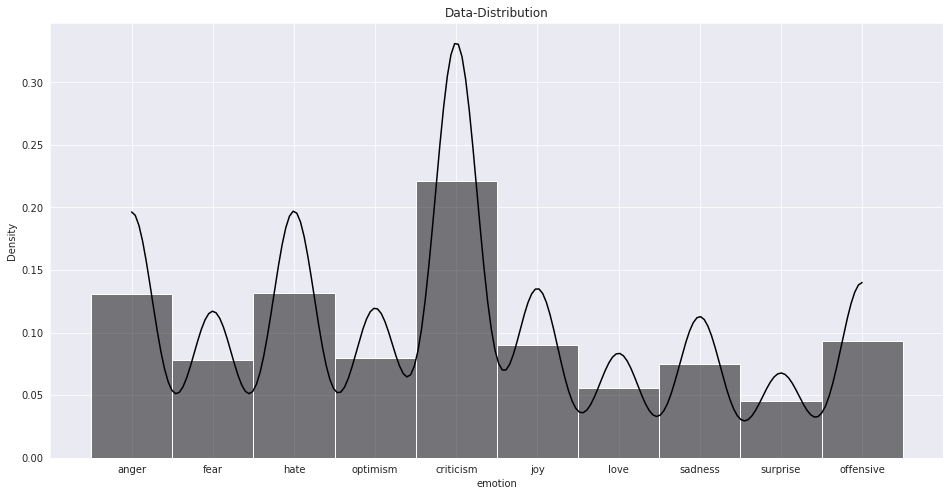

In [59]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,8))
plt.title('Data-Distribution')
sns.histplot(data['emotion'], kde=True, color='black', stat='density')
plt.show()

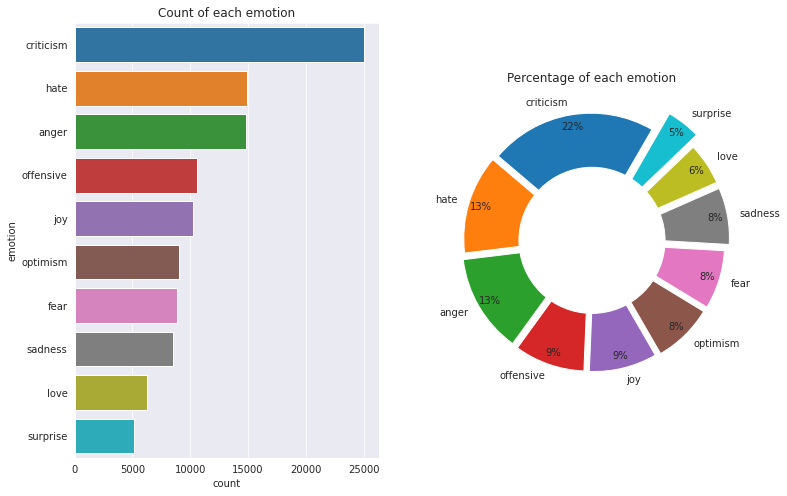

In [60]:
col = 'emotion'
grouped_data = pd.DataFrame(data[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
labels = list(grouped_data.index)
sizes = grouped_data[col]

ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = data, ax=ax1, order =labels)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

### There are 10 different emotions.

In [61]:
# Emotion dataframe
grouped_data = pd.DataFrame(data[col].value_counts())
grouped_data

,emotion
criticism,25066
hate,14886
anger,14839
offensive,10579
joy,10200
optimism,9007
fear,8829
sadness,8520
love,6296
surprise,5106


In [62]:
data['char_length'] = data['raw_tweets'].apply(lambda x : len(x))
data['token_length'] = data['raw_tweets'].apply(lambda x : len(x.split(" ")))

## Distribution of character length and token length overall

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


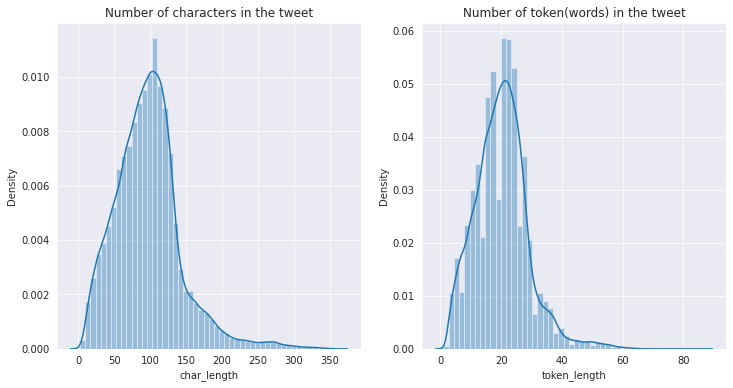

In [63]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(data['char_length'], ax=ax1)
sns.distplot(data['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

## Distribution of character length sentiment-wise [10 Emotions]

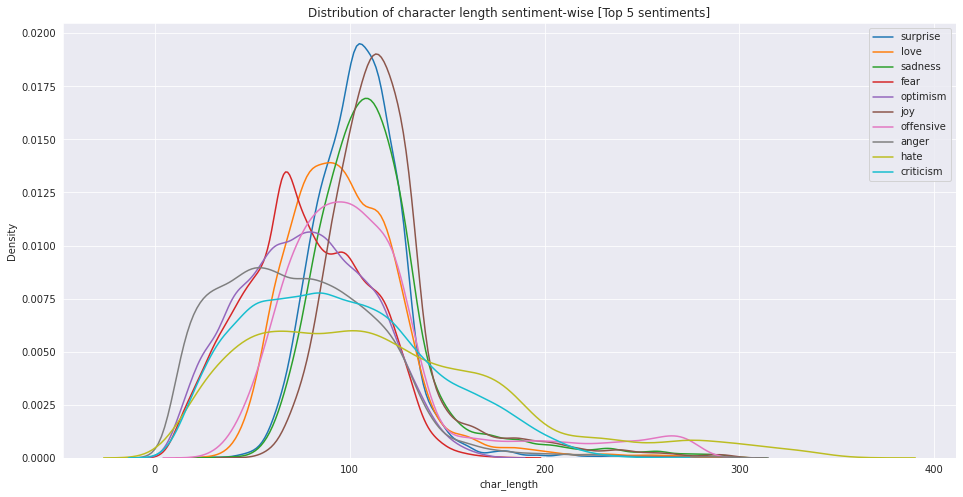

In [64]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in data['emotion'].value_counts().sort_values()[:].index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['emotion']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

## Distribution of token length sentiment-wise [Top 5 Emotions]

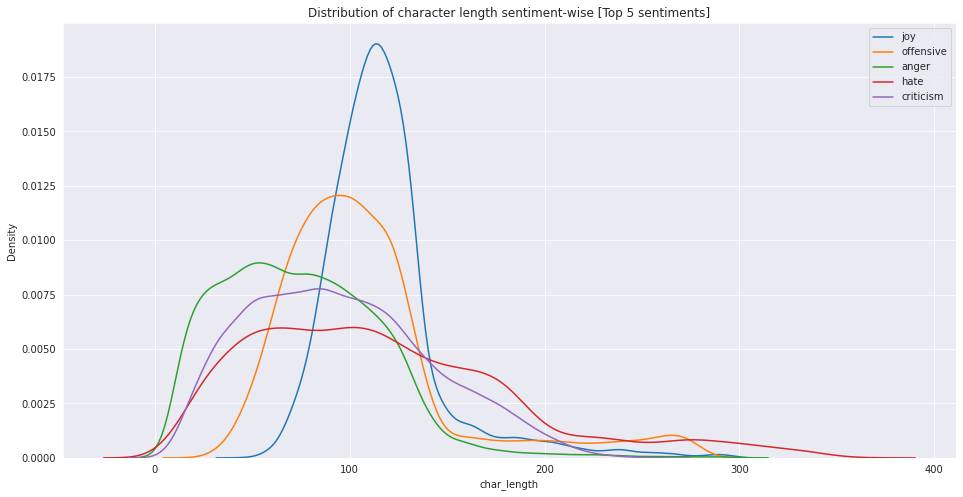

In [65]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in data['emotion'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['emotion']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

## Distribution of token length sentiment-wise [Top 5 Emotions]


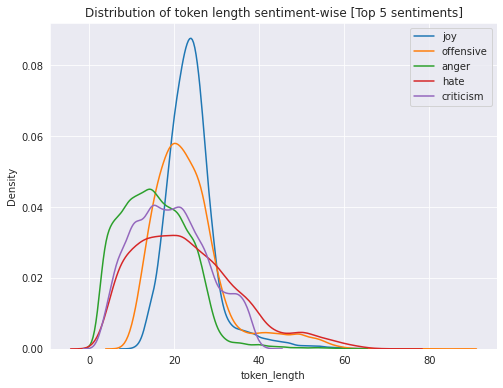

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in data['emotion'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['emotion']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
plt.show()

 **The most frequent token length is around 10.**

## Most common character and token length

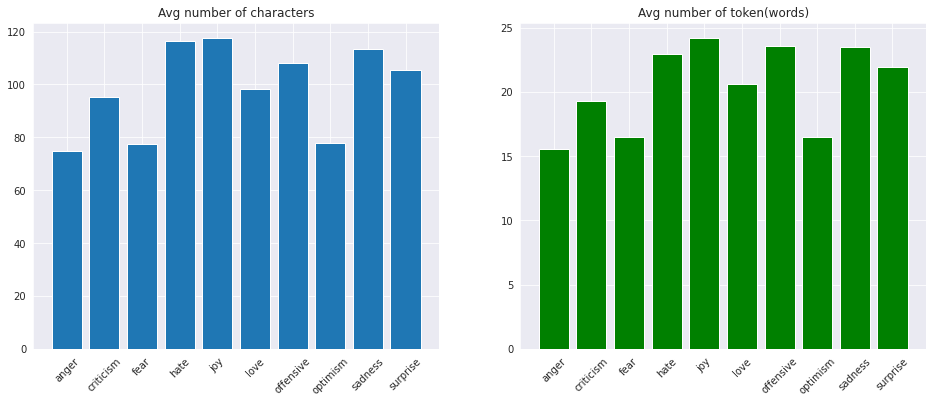

In [67]:
avg_df = data.groupby('emotion').agg({'char_length':'mean', 'token_length':'mean'})

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

In [68]:
data['len']=data['raw_tweets'].apply(lambda x : len([ t for t in x.split()]))

**Relation between sentiment and Tweet length**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


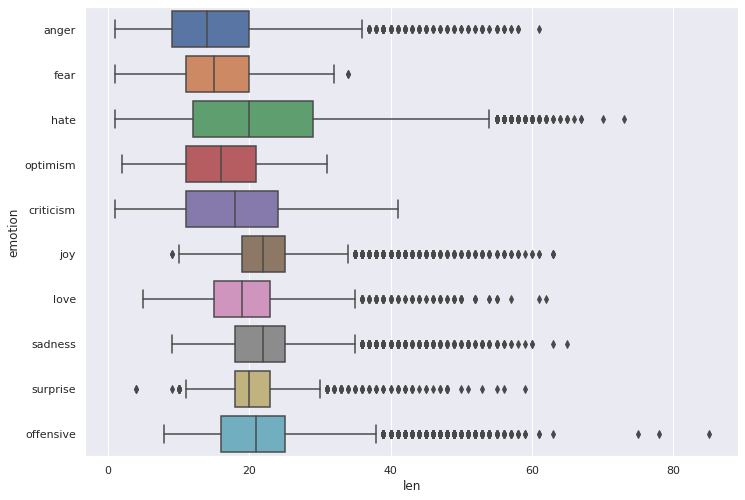

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data['len'],y=data['emotion'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of length')

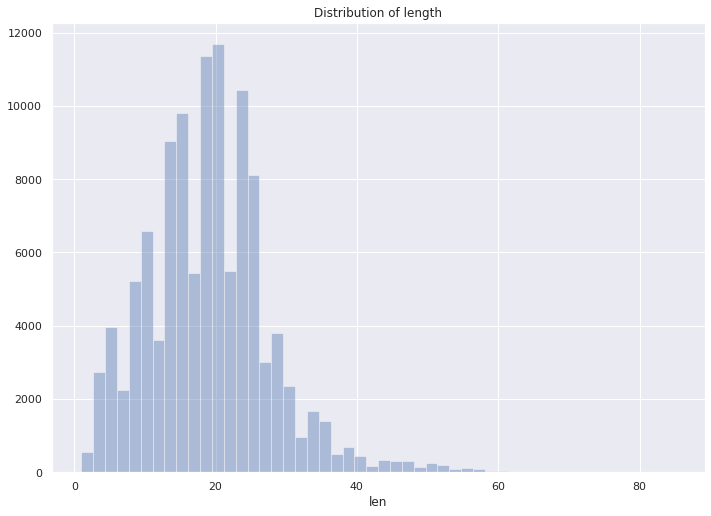

In [70]:
sns.distplot(data['len'],kde=False).set_title('Distribution of length')

## Text Processing

In [71]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
# remove urls
data['cleaned_text'] = data['raw_tweets'].replace(r'http\S+', ' ', regex=True)

# convert to lowercase
data['cleaned_text']=data['raw_tweets'].str.lower()

# contractions
data['cleaned_text']=data['raw_tweets'].apply(contractions.fix)

## removing account names -- basically after @ words -- those are usernames
data['cleaned_text']=data['raw_tweets'].apply(lambda x :[t for t in x.split() if not t.startswith('@')] ).apply(lambda x: ' '.join(x))

## removing special characters and number
data['cleaned_text'] = data['raw_tweets'].replace(r'[^A-Za-z]+', ' ', regex=True)

## removing extra spaces 
data['cleaned_text']=data['raw_tweets'].apply(lambda x : x.strip())


In [73]:
data.head()

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion,char_length,token_length,len,cleaned_text
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger,21,3,3,fuckin m transtelecom
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger,30,5,5,working but it s fridaaaayyyyy
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger,24,7,6,packing i don t like it
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger,96,24,23,i tried to dye my hair and all i got was a blo...
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger,141,28,27,quot locked up abroad quot makes bein half bro...


In [74]:
data.shape

(113328, 9)

In [80]:
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## WordClouds

In [121]:
#WordClouds
def generate_wordcloud(data,Emotion,colormap='Set2'):

    fig = plt.figure(figsize=[20, 10])
    stopwords = set(STOPWORDS)
    stopwords.update(['quot'])
    temp_df = data[data['emotion']==sentiment]

    corpus = ''
    for text in temp_df.lemmas_back_to_text:
        text = str(text)
        corpus += text

    bird = np.array(Image.open('Twitter-Logo.png'))

    wordcloud = WordCloud(mask=bird,colormap=colormap,min_word_length=4,stopwords=stopwords,
                           collocation_threshold=20,background_color='black').generate(corpus)
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')

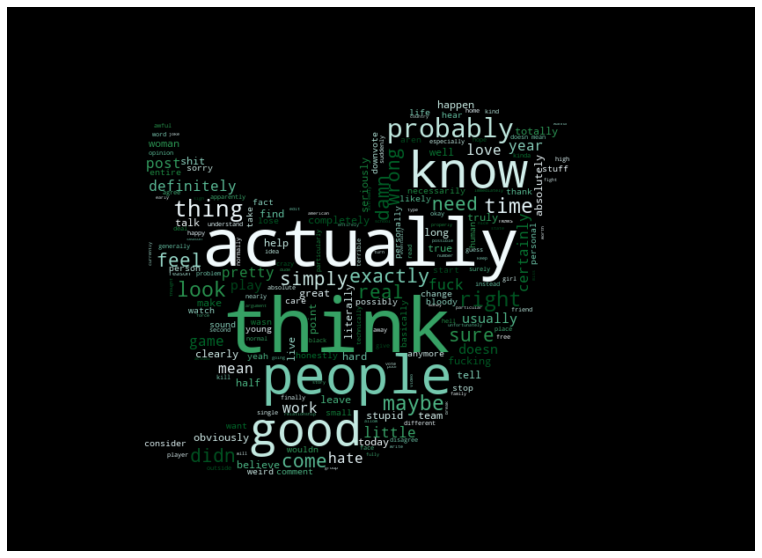

In [123]:
generate_wordcloud(data,'happy','BuGn')

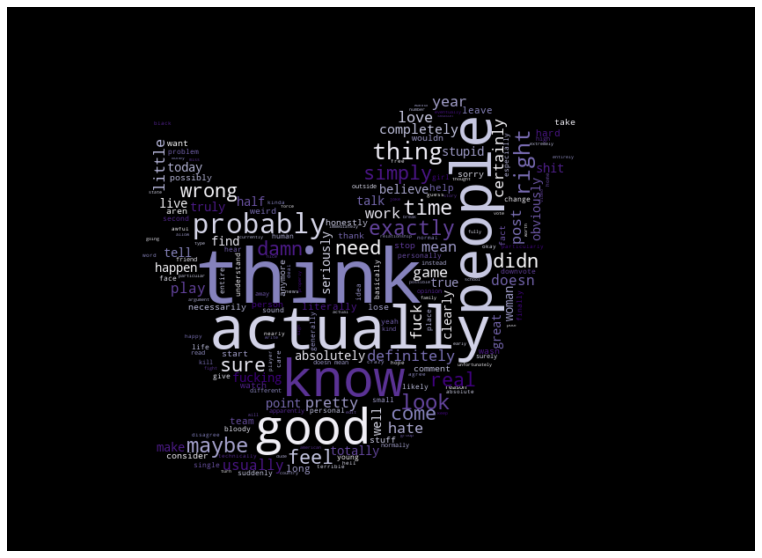

In [124]:
generate_wordcloud(data,'love','Purples')

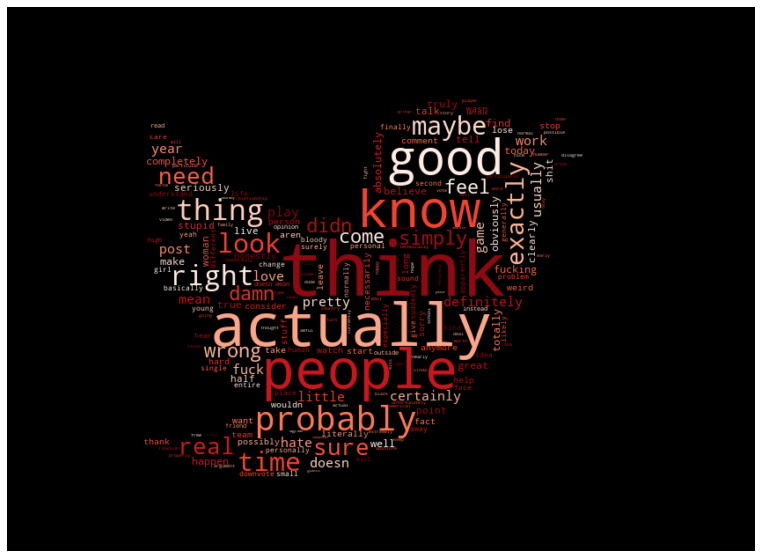

In [125]:
generate_wordcloud(data,'sadness','Reds')

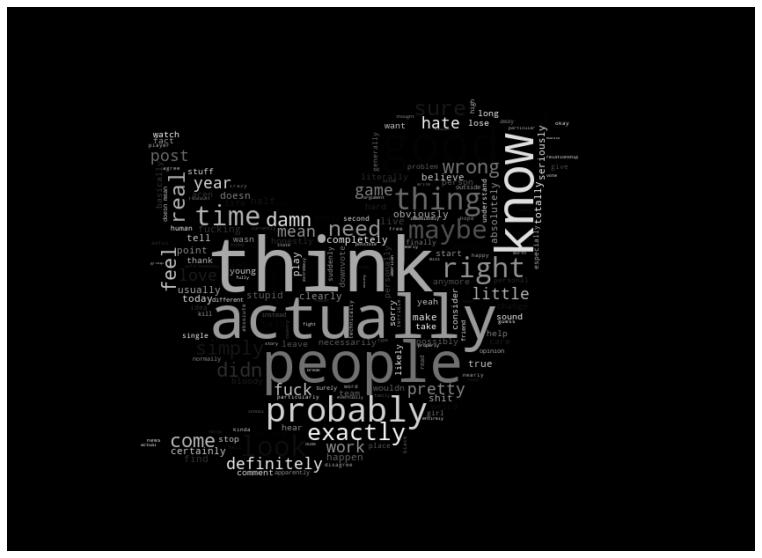

In [126]:
generate_wordcloud(data,'worry','Greys')

**Data Processing**

In [77]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [78]:
import gensim
from spacy.tokenizer import Tokenizer
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

from tqdm import tqdm

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
tokenizer = Tokenizer(nlp.vocab)
custom_stopwords = ['quot','hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords.words("english"))


tokens = []

for doc in tokenizer.pipe(data['cleaned_text'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

data['tokens'] = tokens

data

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion,char_length,token_length,len,cleaned_text,tokens
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger,21,3,3,fuckin m transtelecom,"[fuckin, m, transtelecom]"
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger,30,5,5,working but it s fridaaaayyyyy,"[working, s, fridaaaayyyyy]"
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger,24,7,6,packing i don t like it,"[packing, don, t]"
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger,96,24,23,i tried to dye my hair and all i got was a blo...,"[tried, dye, hair, blond, chunk, middle, hair,..."
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger,141,28,27,quot locked up abroad quot makes bein half bro...,"[locked, abroad, makes, bein, half, brown, goo..."
...,...,...,...,...,...,...,...,...,...,...
113323,1825786991,1sweetwhirl,Sun May 17 06:50:19 PDT 2021,that isnt a bill about lgbt sex workers its a...,offensive,278,56,54,that isnt a bill about lgbt sex workers its a ...,"[isnt, bill, lgbt, sex, workers, bill, sex, wo..."
113324,1825787130,Fanny_Ingabout,Sun May 17 06:50:21 PDT 2021,lol did you just do the trump very fine peopl...,offensive,270,53,51,lol did you just do the trump very fine people...,"[lol, trump, fine, people, sides, antifa, punc..."
113325,1825787235,is_na,Sun May 17 06:50:22 PDT 2021,all i have to say is i amp facial expressions...,offensive,107,25,22,all i have to say is i amp facial expressions ...,"[amp, facial, expressions, video, fucking]"
113326,1825787426,JustMe010,Sun May 17 06:50:24 PDT 2021,wondering what shit on our east coast causing...,offensive,147,29,27,wondering what shit on our east coast causing ...,"[wondering, shit, east, coast, causing, god, s..."


In [83]:
data['tokens_back_to_text'] = [' '.join(map(str, l)) for l in data['tokens']]

def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

data['lemmas'] = data['tokens_back_to_text'].apply(get_lemmas)

data['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in data['lemmas']]

In [84]:
tokenizer = Tokenizer(nlp.vocab)

def tokenize(text):
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) 
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    tokens = re.sub('\w*\d\w*', '', text)
    tokens = re.sub('@*!*\$*', '', text)
    tokens = tokens.strip(',') 
    tokens = tokens.strip('?') 
    tokens = tokens.strip('!') 
    tokens = tokens.strip("'") 
    tokens = tokens.strip(".") 

    tokens = tokens.lower().split() 
    
    return tokens

data['lemma_tokens'] = data['lemmas_back_to_text'].apply(tokenize)

data

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion,char_length,token_length,len,cleaned_text,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger,21,3,3,fuckin m transtelecom,"[fuckin, m, transtelecom]",fuckin m transtelecom,"[fuckin, m, transtelecom]",fuckin m transtelecom,"[fuckin, m, transtelecom]"
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger,30,5,5,working but it s fridaaaayyyyy,"[working, s, fridaaaayyyyy]",working s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]"
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger,24,7,6,packing i don t like it,"[packing, don, t]",packing don t,"[pack, don, t]",pack don t,"[pack, don, t]"
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger,96,24,23,i tried to dye my hair and all i got was a blo...,"[tried, dye, hair, blond, chunk, middle, hair,...",tried dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d..."
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger,141,28,27,quot locked up abroad quot makes bein half bro...,"[locked, abroad, makes, bein, half, brown, goo...",locked abroad makes bein half brown good risk ...,"[lock, abroad, make, bein, half, brown, good, ...",lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113323,1825786991,1sweetwhirl,Sun May 17 06:50:19 PDT 2021,that isnt a bill about lgbt sex workers its a...,offensive,278,56,54,that isnt a bill about lgbt sex workers its a ...,"[isnt, bill, lgbt, sex, workers, bill, sex, wo...",isnt bill lgbt sex workers bill sex workers ge...,"[not, bill, lgbt, sex, worker, bill, sex, work...",not bill lgbt sex worker bill sex worker gener...,"[not, bill, lgbt, sex, worker, bill, sex, work..."
113324,1825787130,Fanny_Ingabout,Sun May 17 06:50:21 PDT 2021,lol did you just do the trump very fine peopl...,offensive,270,53,51,lol did you just do the trump very fine people...,"[lol, trump, fine, people, sides, antifa, punc...",lol trump fine people sides antifa punches naz...,"[lol, trump, fine, people, side, antifa, punch...",lol trump fine people side antifa punch nazi n...,"[lol, trump, fine, people, side, antifa, punch..."
113325,1825787235,is_na,Sun May 17 06:50:22 PDT 2021,all i have to say is i amp facial expressions...,offensive,107,25,22,all i have to say is i amp facial expressions ...,"[amp, facial, expressions, video, fucking]",amp facial expressions video fucking,"[amp, facial, expression, video, fucking]",amp facial expression video fucking,"[amp, facial, expression, video, fucking]"
113326,1825787426,JustMe010,Sun May 17 06:50:24 PDT 2021,wondering what shit on our east coast causing...,offensive,147,29,27,wondering what shit on our east coast causing ...,"[wondering, shit, east, coast, causing, god, s...",wondering shit east coast causing god send flo...,"[wonder, shit, east, coast, cause, god, send, ...",wonder shit east coast cause god send florence...,"[wonder, shit, east, coast, cause, god, send, ..."


In [85]:
df1 = data.copy()
df1 = data[["cleaned_text","lemmas_back_to_text","lemma_tokens", "emotion"]]
df1

,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,fuckin m transtelecom,fuckin m transtelecom,"[fuckin, m, transtelecom]",anger
1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",anger
2,packing i don t like it,pack don t,"[pack, don, t]",anger
3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",anger
4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ...",anger
...,...,...,...,...
113323,that isnt a bill about lgbt sex workers its a ...,not bill lgbt sex worker bill sex worker gener...,"[not, bill, lgbt, sex, worker, bill, sex, work...",offensive
113324,lol did you just do the trump very fine people...,lol trump fine people side antifa punch nazi n...,"[lol, trump, fine, people, side, antifa, punch...",offensive
113325,all i have to say is i amp facial expressions ...,amp facial expression video fucking,"[amp, facial, expression, video, fucking]",offensive
113326,wondering what shit on our east coast causing ...,wonder shit east coast cause god send florence...,"[wonder, shit, east, coast, cause, god, send, ...",offensive


In [86]:
df1 = df1[df1['lemma_tokens'].map(lambda d: len(d)) > 0]
df1

,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,fuckin m transtelecom,fuckin m transtelecom,"[fuckin, m, transtelecom]",anger
1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",anger
2,packing i don t like it,pack don t,"[pack, don, t]",anger
3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",anger
4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ...",anger
...,...,...,...,...
113323,that isnt a bill about lgbt sex workers its a ...,not bill lgbt sex worker bill sex worker gener...,"[not, bill, lgbt, sex, worker, bill, sex, work...",offensive
113324,lol did you just do the trump very fine people...,lol trump fine people side antifa punch nazi n...,"[lol, trump, fine, people, side, antifa, punch...",offensive
113325,all i have to say is i amp facial expressions ...,amp facial expression video fucking,"[amp, facial, expression, video, fucking]",offensive
113326,wondering what shit on our east coast causing ...,wonder shit east coast cause god send florence...,"[wonder, shit, east, coast, cause, god, send, ...",offensive


In [ ]:
Topic Modelling
LDA - CountVectorizer

# Topic Modelling
**LDA - CountVectorizer **

In [ ]:
Topic Modelling
LDA - CountVectorizer

In [101]:
from sklearn.decomposition import LatentDirichletAllocation
vec = CountVectorizer(
analyzer='word',       
min_df=3,
stop_words='english',
lowercase=True,
token_pattern='[a-zA-Z0-9]{3,}',
max_features=5000
                            )
vec_dm = vec.fit_transform(df1['lemmas_back_to_text'])
vec_dm

<113263x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 750909 stored elements in Compressed Sparse Row format>

In [88]:
lda_model = LatentDirichletAllocation(
n_components=6, 
learning_method='online',
random_state=20,       
                                     )
lda_vec_output = lda_model.fit_transform(vec_dm)

In [90]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=557de343e02aab906945849c2f9f88964184ac0c57d69dec5db3eaaad7021192
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f1494d0a84d8eca684e97a6e8b8c0cc431411b8792bca52e6004ae7494bb283f
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [91]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, vec_dm, vec)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.205517  0.006795       1        1  18.963642
4     -0.276767 -0.013803       2        1  18.118796
3      0.117880  0.098059       3        1  17.399613
0     -0.014181 -0.243670       4        1  15.881344
5      0.277443 -0.186467       5        1  15.106679
2      0.101142  0.339086       6        1  14.529926, topic_info=        Term          Freq         Total Category  logprob  loglift
435    bitch  10071.000000  10071.000000  Default  30.0000  30.0000
2650    love   8530.000000   8530.000000  Default  29.0000  29.0000
1633    feel  10780.000000  10780.000000  Default  28.0000  28.0000
1783    fuck   4119.000000   4119.000000  Default  27.0000  27.0000
2632    look   3978.000000   3978.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
4203   start   1008.435467   1806.115173   Topic6  -4.7282   1.3462
1388     eat    829.030452   1213.961112   Topic6  -4.9241   1.5476
2625     lol   1059.662211   2078.978693   Topic6  -4.6787   1.2550
1306     don   1379.060157   6869.851676   Topic6  -4.4152   0.3232
3224  people   1119.827394   5693.376176   Topic6  -4.6234   0.3028

[272 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
45        2  0.999825   actually
76        2  0.998928     afraid
99        2  0.999386        ain
136       2  0.999102    amazing
147       4  0.352235        amp
...     ...       ...        ...
4973      1  0.709126       year
4973      4  0.290514       year
4979      5  0.999015        yes
4980      2  0.998879  yesterday
4984      4  0.998765      young

[279 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 6, 3])

**LDA - TF-IDF**

In [102]:
from sklearn.decomposition import LatentDirichletAllocation

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
!pip install tfidf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tfidf: filename=tfidf-0.0.6-py3-none-any.whl size=2411 sha256=1fc7cf26d4c57f6a939423bdb44837c810d7dc90d909abbd6dcbe5921f21297f
  Stored in directory: /root/.cache/pip/wheels/8b/72/4a/8d8079ffe00a3cae49d05cb28fa94f318ae97276a888e28a68
  Created wheel for etl-utils: filename=etl_utils-0.1.11-py3-none-any.whl size=21643 sha256=4d316842bb1286d4425d1ccd7d9754bf4584f1d397dfcea79947954730e9d0ee
  Stored in directory: /root/.cache/pip/wheels/f4/d1/fa/7f8f0b3bdcced0f1205bac981c449925992e5c785bfcd15dde
  Created wheel for progressbar: filename=progressbar-2.2-py3-none-any.whl size=6462 sha256=e8724d21db04e701caefac3e6750dd7c08657881851764b700049a5203a5bb3a
  Stored in directory: /root/.cache/pip/wheels/ed/19/57/6fd2895583ffe9b5663099963c99f4a3e3d226c6d8c1c718c0
  Created wheel for pysingleton: filename=pysingleton-0.2.1-py3-none-any.whl size=2199 sha256=25be4f60933c86db1b06604f5

In [116]:


tfidf = TfidfVectorizer(
analyzer='word',       
min_df=3,
stop_words='english',
lowercase=True,
token_pattern='[a-zA-Z0-9]{3,}',
max_features=5000,
                            )
tfidf_dm = tfidf.fit_transform(df1['lemmas_back_to_text'])
tfidf_dm

<113263x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 750909 stored elements in Compressed Sparse Row format>

In [117]:
lda_model = LatentDirichletAllocation(
n_components=6, 
learning_method='online',
random_state=20,       
n_jobs = -1  
                                     )
lda_tfidf_output = lda_model.fit_transform(tfidf_dm)

In [118]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, tfidf_dm, tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.018821  0.006644       1        1  18.850126
4      0.148073 -0.156137       2        1  17.523502
5     -0.254824 -0.154955       3        1  16.117516
2      0.229831 -0.117761       4        1  16.104195
3     -0.233637  0.086541       5        1  15.991393
0      0.091736  0.335669       6        1  15.413268, topic_info=       Term         Freq        Total Category  logprob  loglift
435   bitch  2458.000000  2458.000000  Default  30.0000  30.0000
2095    hoe   995.000000   995.000000  Default  29.0000  29.0000
2023   hate   794.000000   794.000000  Default  28.0000  28.0000
147     amp  1106.000000  1106.000000  Default  27.0000  27.0000
2632   look  1056.000000  1056.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
523   break   238.299361   373.283888   Topic6  -5.1741   1.4211
4417   tell   278.366860   697.588479   Topic6  -5.0187   0.9513
2625    lol   263.798514   636.101197   Topic6  -5.0725   0.9898
2650   love   312.767132  1982.047715   Topic6  -4.9022   0.0235
2947   need   244.889107   855.311709   Topic6  -5.1468   0.6193

[304 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5         1  0.995144        able
11        5  0.995568  absolutely
36        5  0.996275         act
45        2  0.738469    actually
45        4  0.260456    actually
...     ...       ...         ...
4973      3  0.106402        year
4973      5  0.274141        year
4973      6  0.225321        year
4980      2  0.996491   yesterday
4984      4  0.997527       young

[379 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 6, 3, 4, 1])

**LSA - CountVectorizer**

In [119]:
lsa = TruncatedSVD(6)
doc_topic = lsa.fit_transform(vec_dm, vec.fit_transform(df1['lemmas_back_to_text']))

print('Variance Ratio:')
print(lsa.explained_variance_ratio_,'\n')

print('Sum of Variance Ratio:',lsa.explained_variance_ratio_.sum(),'\n')

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic", ix)
        else:
            print("\nTopic:",topic_names[ix])
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print('Topics:')
model = lsa
feature_names = vec.get_feature_names()
no_top_words = 10
topic_names = None
for ix, topic in enumerate(model.components_):
    if not topic_names or not topic_names[ix]:
        print("\nTopic", ix)
    else:
        print("\nTopic:",topic_names[ix])
    print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

column_names = []
for i in range(0,19):
    column_names.append('Topic_' + str(i))

Variance Ratio:
[0.01071519 0.01595876 0.01314273 0.01073423 0.0100547  0.00822287] 

Sum of Variance Ratio: 0.06882848323270215 

Topics:

Topic 0
user, feel, bitch, don, love, people, know, think, good, time

Topic 1
user, illegal, buildthatwall, trump, maga, twitter, immigration, facebook, woman, buildthewall

Topic 2
bitch, fuck, don, ass, shit, hoe, nigga, love, know, amp

Topic 3
love, don, people, good, today, think, tomorrow, afraid, yesterday, day

Topic 4
love, bitch, feel, today, tomorrow, yesterday, afraid, fuck, ass, user

Topic 5
good, amp, day, time, people, hope, bad, come, look, work


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**LSA - TF-IDF**

In [120]:
lsa = TruncatedSVD(6)
doc_topic = lsa.fit_transform(tfidf_dm, tfidf.fit_transform(df1['lemmas_back_to_text']))

print('Variance Ratio:')
print(lsa.explained_variance_ratio_,'\n')

print('Sum of Variance Ratio:',lsa.explained_variance_ratio_.sum(),'\n')

print('Topics:')
model = lsa
feature_names = vec.get_feature_names()
no_top_words = 10
topic_names = None
for ix, topic in enumerate(model.components_):
    if not topic_names or not topic_names[ix]:
        print("\nTopic", ix)
    else:
        print("\nTopic:",topic_names[ix])
    print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

column_names = []
for i in range(0,19):
    column_names.append('Topic_' + str(i))

Variance Ratio:
[0.00342913 0.00681089 0.00561159 0.00465232 0.00436356 0.00433467] 

Sum of Variance Ratio: 0.029202159161725832 

Topics:

Topic 0
love, bitch, feel, don, fuck, know, good, think, today, people

Topic 1
love, afraid, yesterday, tomorrow, today, amen, rev, awesome, aww, share

Topic 2
bitch, fuck, ass, hoe, shit, nigga, afraid, yesterday, tomorrow, today

Topic 3
feel, fuck, hope, day, bad, thing, work, today, little, way

Topic 4
hope, good, bitch, luck, day, thank, user, thing, man, year

Topic 5
fuck, hope, good, don, think, luck, thank, love, game, hate


 **Making final dataset**

In [127]:
df1.head()

,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,fuckin m transtelecom,fuckin m transtelecom,"[fuckin, m, transtelecom]",anger
1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",anger
2,packing i don t like it,pack don t,"[pack, don, t]",anger
3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",anger
4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ...",anger


In [128]:
df1.to_csv('tokena.csv')

In [129]:
df1 =pd.read_csv("tokena.csv")

In [130]:
df1.head()

,Unnamed: 0,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,0,fuckin m transtelecom,fuckin m transtelecom,"['fuckin', 'm', 'transtelecom']",anger
1,1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"['work', 's', 'fridaaaayyyyy']",anger
2,2,packing i don t like it,pack don t,"['pack', 'don', 't']",anger
3,3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"['try', 'dye', 'hair', 'blond', 'chunk', 'midd...",anger
4,4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"['lock', 'abroad', 'make', 'bein', 'half', 'br...",anger


In [131]:
df1.drop('lemmas_back_to_text', axis=1, inplace=True)

In [132]:
df1.drop('lemma_tokens', axis=1, inplace=True)

In [133]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#df1.drop('Unnamed: 0.1', axis=1, inplace=True)

In [134]:
df1.head()

,cleaned_text,emotion
0,fuckin m transtelecom,anger
1,working but it s fridaaaayyyyy,anger
2,packing i don t like it,anger
3,i tried to dye my hair and all i got was a blo...,anger
4,quot locked up abroad quot makes bein half bro...,anger


In [139]:
df1.to_csv('cleaned_text.csv')

In [141]:
data1=pd.read_csv("cleaned_text.csv")

In [137]:
data1.drop('Unnamed: 0', axis=1, inplace=True)
data1.head()

,cleaned_text,emotion
0,fuckin m transtelecom,anger
1,working but it s fridaaaayyyyy,anger
2,packing i don t like it,anger
3,i tried to dye my hair and all i got was a blo...,anger
4,quot locked up abroad quot makes bein half bro...,anger


In [138]:
data1.shape

(113263, 2)